## Analysis of cpu and ram usage, as well as the time elapsed for the different jobs

In [155]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [156]:
def read_logs_from_folder(path_to_json):
    folders = [
        "namenode",
        "datanode-1",
        "datanode-2",
        "datanode-3",
    ]
    # this finds our json files

    df = None
    # we need both the json and an index number so use enumerate()
    for index, folder in enumerate(folders):
        new_df = pd.read_csv(f"{path_to_json}{folder}/" + "usage.log", delimiter="\t", skiprows=[0,1,2], names=["timestamp", "cpu", "ram", "empty"])
        # add node
        new_df["node"] = folder
        if (df is None):
            df = new_df
        else:
            df = df.append(new_df)
    # drop empty
    df = df.drop(columns=["empty"])


    # convert timestamp to elapsed
    # convert datetime to seconds
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    # elapsed time in seconds since first timestamp
    df["elapsed"] =  df["timestamp"] - df["timestamp"].min()
    # format elapsed time with one decimal place
    df["elapsed"] = df["elapsed"].dt.total_seconds().round(1)

    return df

In [157]:
# plot cpu and ram
def plot_usage(df, y_param, title, ax):
    df_namenode = df[df["node"] == "namenode"].rolling(2).mean()
    df_datanode_1 = df[df["node"] == "datanode-1"].rolling(2).mean()
    df_datanode_2 = df[df["node"] == "datanode-2"].rolling(2).mean()
    df_datanode_3 = df[df["node"] == "datanode-3"].rolling(2).mean()

    plt.rcParams.update({'font.size': 15})
    firstPlot = df_namenode.plot(x='elapsed', y=y_param,ax=ax, label="Namenode " + y_param,  title=title + " " + y_param,  figsize=(10, 7))
    secondPlot = df_datanode_1.plot(x='elapsed', y=y_param, ax=ax, label="Datanode 1 " + y_param)
    thirdPlot = df_datanode_2.plot(x='elapsed', y=y_param, ax=ax, label="Datanode 2 " + y_param)
    fourthPlot = df_datanode_3.plot(x='elapsed', y=y_param, ax=ax, label="Datanode 3 " + y_param)

def plot_cpu_ram_combined(df, title):
    # print first timestamp
    print(f"Test done at: {df['timestamp'].min()}")

    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.subplots_adjust(hspace = 0.45)
    plot_usage(df, "cpu", title, ax1)
    plot_usage(df, "ram",  title, ax2)
    plt.show()

## Training preprocess

logs:
```
-- NEW RUN, datetime: 2022-04-22 12:58:29.403553 -- 
New test for node: namenode 77.53787899017334
```

Test done at: 2022-04-22 12:56:17.035681


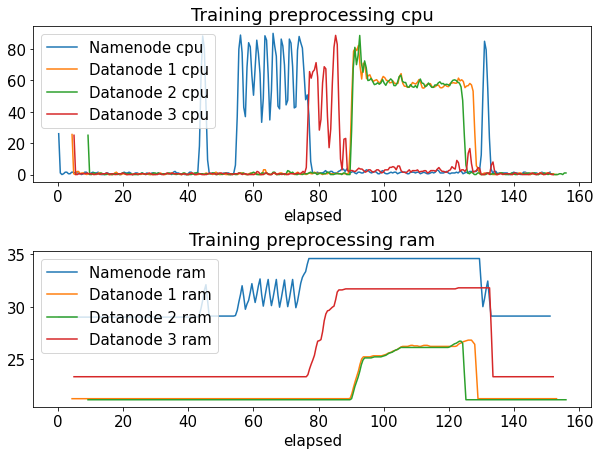

In [158]:
training_data_preprocessing_df = read_logs_from_folder("./logs/training_data_preprocessing/")
plot_cpu_ram_combined(training_data_preprocessing_df,  "Training preprocessing")

## Covid tweets preprosessing

logs:
```
-- NEW RUN, datetime: 2022-04-22 12:42:17.037788 -- 
New test for node: namenode 367.573627948761
```

Test done at: 2022-04-22 12:35:18.936945


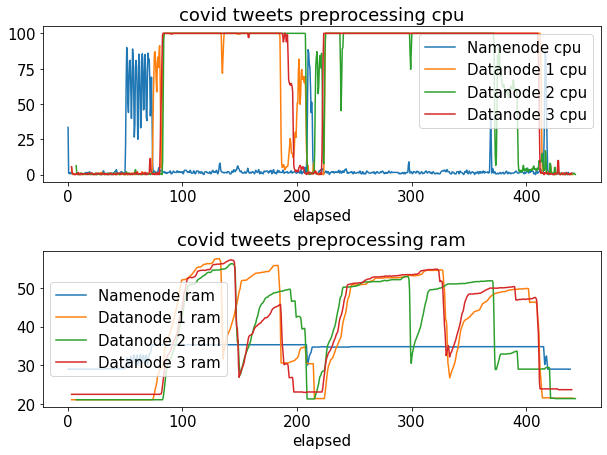

In [159]:
mrjob_prepross_df = read_logs_from_folder("./logs/covid_tweets_preprocessing/")
plot_cpu_ram_combined(mrjob_prepross_df,   "covid tweets preprocessing")

## Mrjob batch

logs:
```
-- NEW RUN, datetime: 2022-04-24 10:17:36.518490 -- 
New test for node: namenode 234.61888217926025
```

Test done at: 2022-04-24 10:13:22.066218


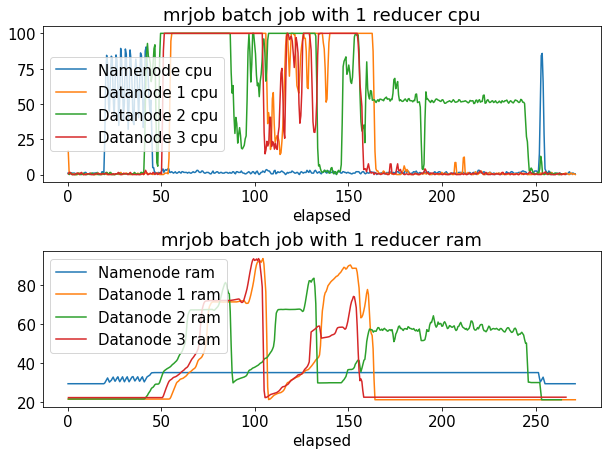

In [176]:
mrjob_batch_df = read_logs_from_folder("./logs/mrjob_batch/")
plot_cpu_ram_combined(mrjob_batch_df,  "mrjob batch job with 1 reducer")

## mrjob_batch_2_reducers

logs:
```
-- NEW RUN, datetime: 2022-04-24 20:26:41.428357 -- 
New test for node: namenode 425.6002013683319
```

Test done at: 2022-04-24 20:19:09.616487


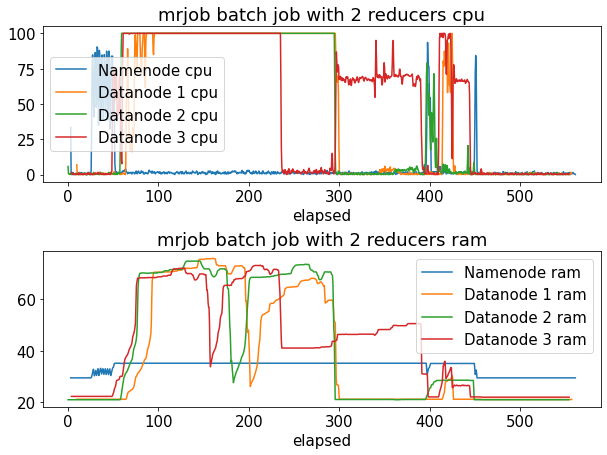

In [178]:
# mrjob_batch_2_reducers
mrjob_2_reducers = read_logs_from_folder("./logs/mrjob_batch_2_reducers/")
plot_cpu_ram_combined(mrjob_2_reducers,  "mrjob batch job with 2 reducers")

## spark_batch (Only 2 excecutors and uncleaned code)

logs:
```
-- NEW RUN, datetime: 2022-04-24 20:30:14.388093 -- 

df.count(): 5684389
predictions.count(): 5684389
Program took 374.3957507610321 seconds
```

Test done at: 2022-04-24 20:29:42.457861


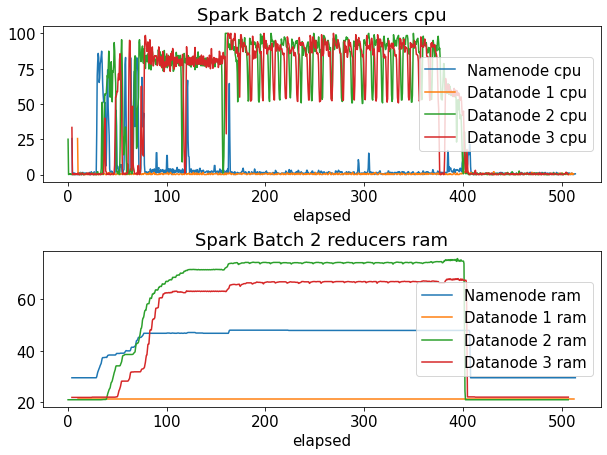

In [162]:
# spark_batch_df
spark_batch_df = read_logs_from_folder("./logs/spark_batch/")
plot_cpu_ram_combined(spark_batch_df,  "Spark Batch job using RDDs v1")

## spark stream Only 2 excecutors

Test done at: 2022-04-25 03:38:16.373290


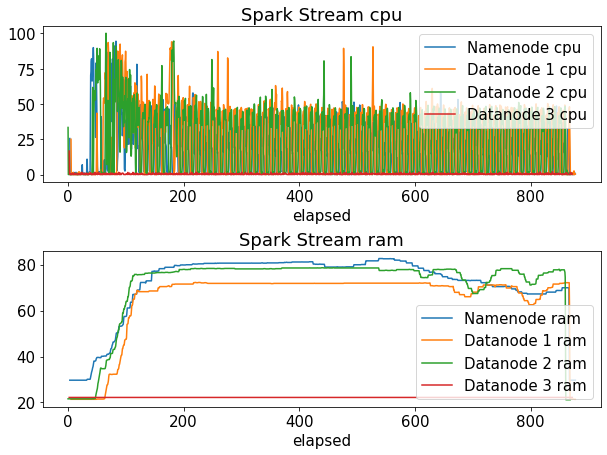

In [163]:
spark_stream_df = read_logs_from_folder("./logs/spark_stream//")
plot_cpu_ram_combined(spark_stream_df,  "Spark Stream")

# After updating Spark confit to use 3 executors

## All spark jobs

Spark sql version large dataset

logs:
```
-- NEW RUN, datetime: 2022-04-30 13:56:31.926779 -- 

Program took 206.04946732521057 seconds
```

Test done at: 2022-04-30 13:55:57.338580


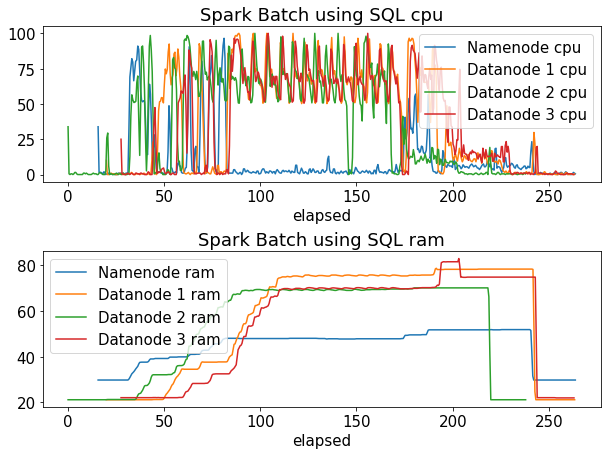

In [164]:
# spark sql large
spark_batch_df = read_logs_from_folder("./logs/spark_batch_SQL_v2/")
plot_cpu_ram_combined(spark_batch_df,  "Spark Batch using SQL")

Spark sql version small dataset

logs:
```
-- NEW RUN, datetime: 2022-04-30 14:39:34.550178 -- 

Program took 114.59063720703125 seconds
```

Test done at: 2022-04-30 14:38:46.465416


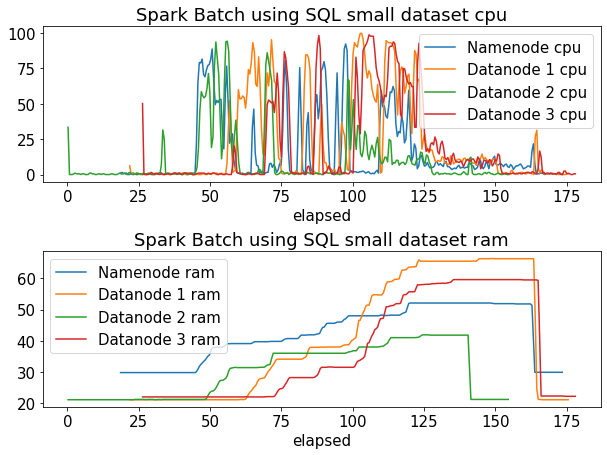

In [165]:
# spark sql small
spark_batch_df = read_logs_from_folder("./logs/spark_batch_SQL_v2_shortened/")
plot_cpu_ram_combined(spark_batch_df,   "Spark Batch using SQL small dataset")

Spark 2 reducers large

logs:
```
-- NEW RUN, datetime: 2022-04-30 13:43:37.628656 -- 

Program took 202.29772639274597 seconds
```

Test done at: 2022-04-30 13:43:07.218341


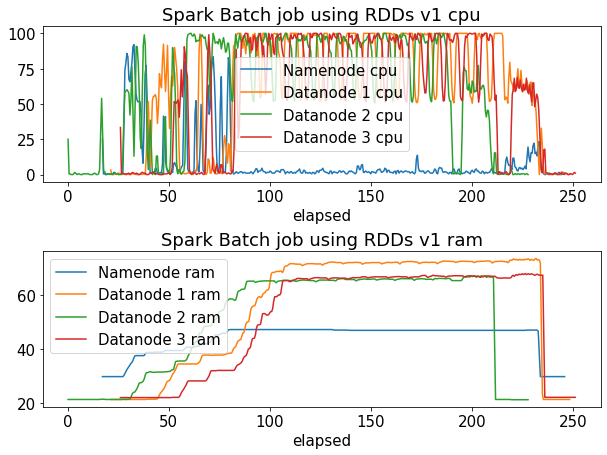

In [181]:
# spark 2 reducer large
spark_batch_df = read_logs_from_folder("./logs/spark_batch_v2/")
plot_cpu_ram_combined(spark_batch_df,  "Spark Batch job using RDDs v1")

Spark 2 reducers small

logs:
```
-- NEW RUN, datetime: 2022-04-30 14:51:43.492280 -- 

Program took 59.46880030632019 seconds
```

Test done at: 2022-04-30 14:51:10.196973


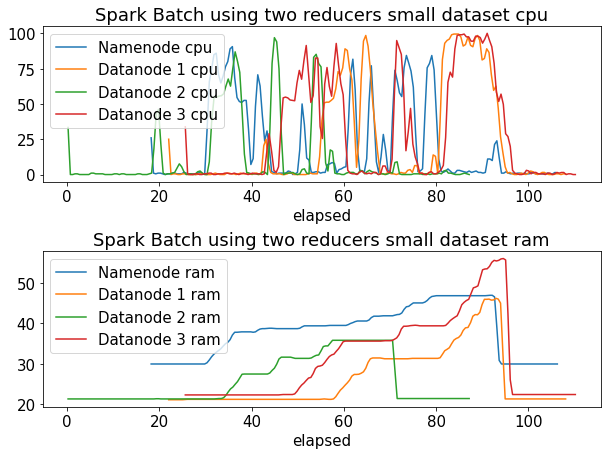

In [167]:
# spark 2 reducer small
spark_batch_df = read_logs_from_folder("./logs/spark_batch_v2_shortened/")
plot_cpu_ram_combined(spark_batch_df,  "Spark Batch using two reducers small dataset")

Spark 1 groupbyKey large

logs:
```
-- NEW RUN, datetime: 2022-04-30 14:32:28.096073 -- 

Program took 211.55773425102234 seconds
```

Test done at: 2022-04-30 14:31:53.935517


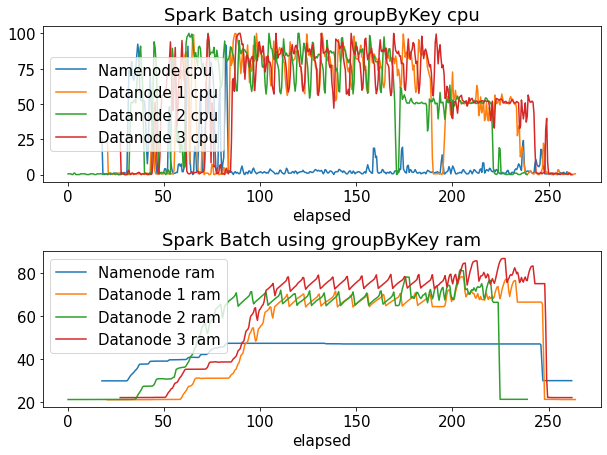

In [168]:
# spark 2 reducer small
spark_batch_df = read_logs_from_folder("./logs/spark_batch_1_red_groupByKey_v2/")
plot_cpu_ram_combined(spark_batch_df,  "Spark Batch using groupByKey")

Spark 1 groupbyKey small

logs:
```
-- NEW RUN, datetime: 2022-05-01 08:15:35.645005 -- 

Program took 57.46516299247742 seconds
```

Test done at: 2022-05-01 08:14:59.979598


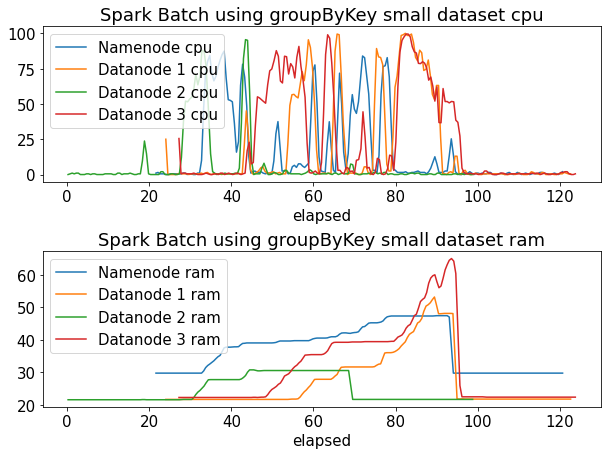

In [169]:
# spark 2 reducer small
spark_batch_df = read_logs_from_folder("./logs/spark_batch_1_red_groupByKey_v2_shortened/")
plot_cpu_ram_combined(spark_batch_df,  "Spark Batch using groupByKey small dataset")

mrjob small dataset (small datasett)

logs:
```
-- NEW RUN, datetime: 2022-04-30 14:56:31.156280 -- 
New test for node: namenode 92.76760625839233
```

Test done at: 2022-04-30 14:54:14.596544


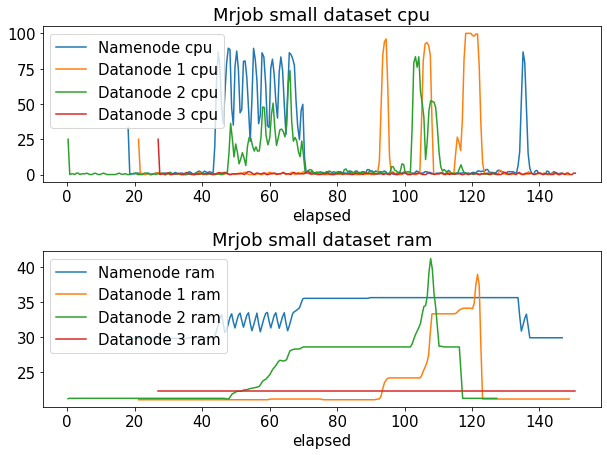

In [170]:
# msjob small #TODO: sjekk med kjøretimestamp når dne var ferdig, så noe rart ut dette
mrjob_batch_df = read_logs_from_folder("./logs/mrjob_batch_shortened/")
plot_cpu_ram_combined(mrjob_batch_df,  "Mrjob small dataset")

Ml training (dropper hvertfall denne i rapport)

logs:
```
-- NEW RUN, datetime: 2022-04-30 15:02:03.397422 -- 

Using preprocessed data
Showed init dataset
Training data count: 981855, Testing data count: 245210
Start training at: 2022-04-30 15:03:24.035299
Training finnish at: 2022-04-30 15:04:09.271442
Training is done, took 45.2364661693573 seconds
Correct predictions (using ml model): 187039, Total predictions: 245210, Accuracy: 0.7627706863504751
Correct predictions (using Textblob): 145697, Total predictions: 245210, Accuracy: 0.5941723420741405
Correct predictions (using Dictionary classification): 157028, Total predictions: 245210, Accuracy: 0.6403817136332124
Correct predictions (using loaded ml model): 187039, Total predictions: 245210, Accuracy: 0.7627706863504751
Predictions:
[Row(tokens=['love', 'this', 'movie'], prediction=4.0, target=1), Row(tokens=['great', 'day'], prediction=4.0, target=1), Row(tokens=['training', 'tough', 'but', 'feels', 'really', 'good', 'after'], prediction=0.0, target=1), Row(tokens=['thats', 'wierd'], prediction=4.0, target=0), Row(tokens=['This', 'movie', 'terrible'], prediction=0.0, target=0), Row(tokens=['horrible', 'song'], prediction=0.0, target=0)]
Program took 384.23112082481384 seconds

```

Test done at: 2022-04-30 15:01:22.646477


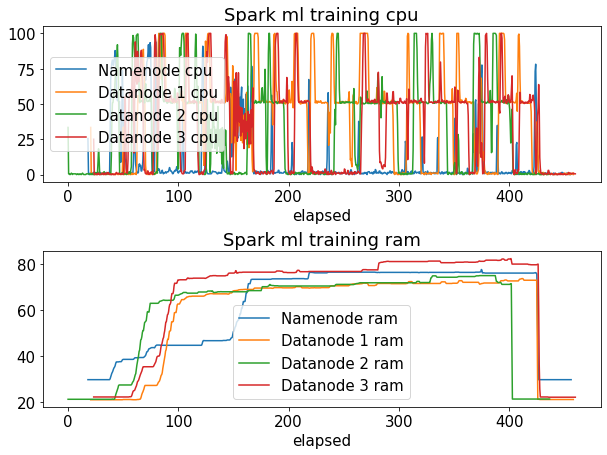

In [171]:
# spark ml
spark_batch_df = read_logs_from_folder("./logs/train_ml_model_v2/")
plot_cpu_ram_combined(spark_batch_df,  "Spark ml training")

Stream filter stream

Test done at: 2022-05-01 08:20:05.697347


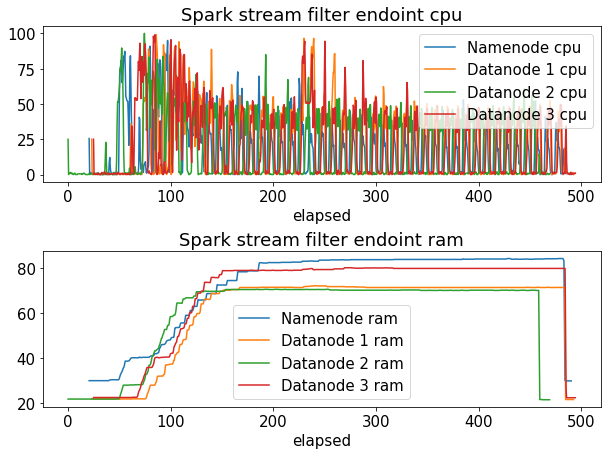

In [172]:
spark_stream_df = read_logs_from_folder("./logs/spark_stream_v2/")
plot_cpu_ram_combined(spark_stream_df,  "Spark stream filter endoint")

Spark sample stream

Test done at: 2022-05-01 09:02:09.067006


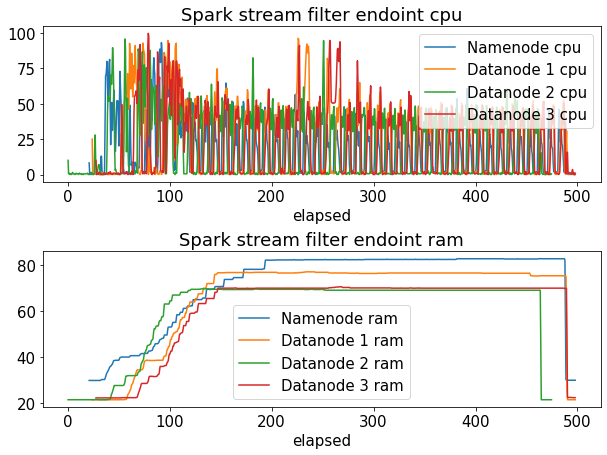

In [173]:
spark_stream_df = read_logs_from_folder("./logs/spark_stream_v2_sample/")
plot_cpu_ram_combined(spark_stream_df,  "Spark stream sample endoint")

Spark sample stream witghout trigger window

Test done at: 2022-05-01 09:13:54.960577


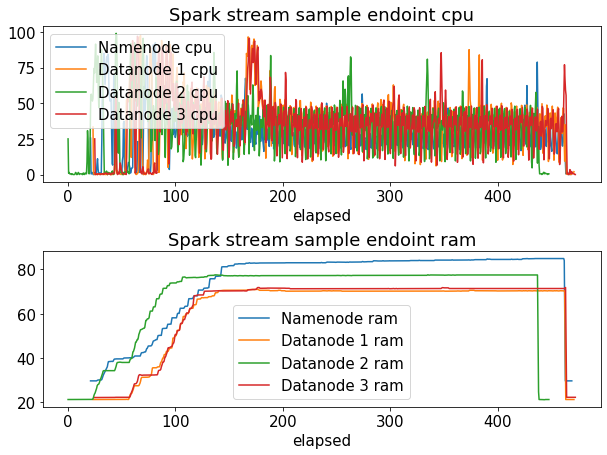

In [182]:
spark_stream_df = read_logs_from_folder("./logs/spark_stream_v2_sample_notrigger/")
plot_cpu_ram_combined(spark_stream_df,  "Spark stream sample endoint")